In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import autoroot

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [20]:
from metzler_renderer.geometry import (
    Plane,
    Direction,
    Quadrant,
    ShapeString,
    MetzlerShape
)
from metzler_renderer.renderer import (
    Camera,
    Renderer,
    Object3D
)

In [11]:
from metzler_renderer.utils import sample_interval_union, zreflect

In [12]:
from metzler_renderer.geometry import ShapeGenerator

In [13]:
# read shape strings from the file
with open(
    "../data/shapes.txt",
    "r",
    encoding="utf-8"
) as reader:
    shapes = reader.read().splitlines()

shapes = list(map(ShapeString, shapes))

# create the camera object
camera = Camera()
# create the renderer object
renderer = Renderer(
    imgsize=(256, 256),
    dpi=100,
    bgcolor="white",
    format="png"
)

<Figure size 256x256 with 0 Axes>

# Example 1: Create a pair of shapes (mirror)

In [14]:
shape = shapes[5]

In [15]:
object_params = {
    "facecolor": "white",
    "edgecolor": "black",
    "edgewidth": 0.8
}

In [16]:
baseline = Object3D(
    shape=MetzlerShape(shape),
    **object_params
)

In [17]:
target = Object3D(
    shape=MetzlerShape(shape.reflect(over=Plane(2))), # mirror canonical view around Z-axis
    **object_params
)

In [18]:
sample = []

for obj, (phi, theta) in zip([baseline, target], [(20 + 45, -35), [20 - 135, -35]]):
    camera.setSphericalPosition(
        r=25,
        theta=theta,
        phi=phi
    )
    renderer.render(obj, camera)
    sample.append(renderer.save_figure_to_numpy())

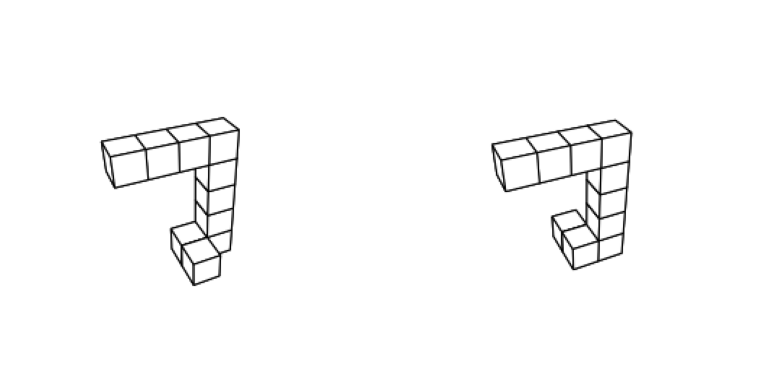

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), layout="tight")

for i, obj in enumerate(sample):
    ax[i].imshow(obj)
    ax[i].axis("off")

# Example 2: Change a skeleton description of the shape

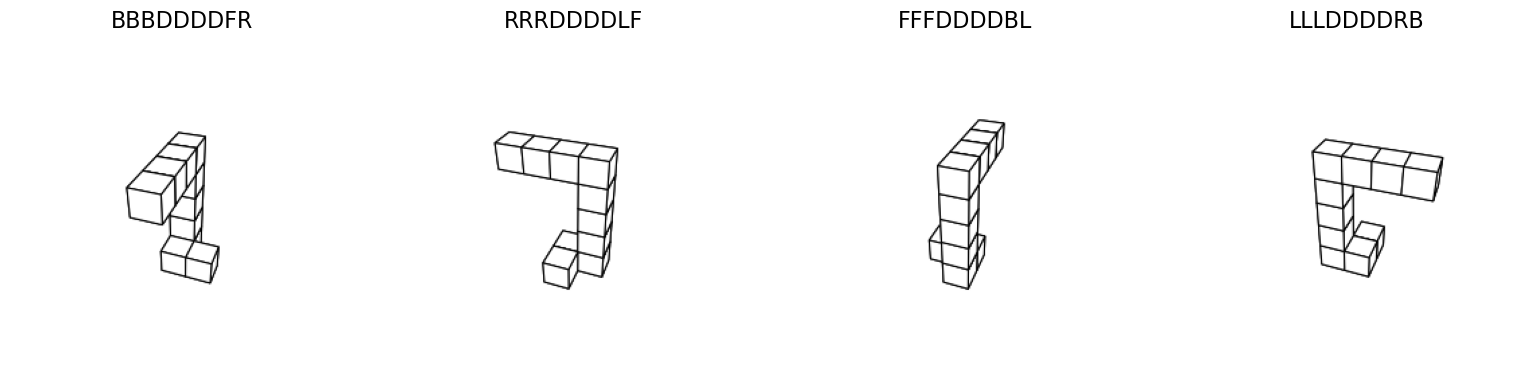

In [30]:
fig = plt.figure(figsize=(16, 4))

for q in (0, 1, 2, 3):
    # changing the viewing quadrant corresponds to rotating the shape by 90 degrees about a vertical axis
    shape_changed = shape.change_quadrant(Quadrant(q))  

    obj = Object3D(
        shape=MetzlerShape(shape_changed),
        **object_params
    )

    camera.setSphericalPosition(
        r=25,
        theta=-35,
        phi=20
    )
    renderer.render(obj, camera)

    obj_npy = renderer.save_figure_to_numpy()

    ax = fig.add_subplot(1, 4, q+1)
    ax.imshow(obj_npy)
    ax.axis("off")
    ax.set_title(str(shape_changed).upper(), fontsize=16)